# Spotify songs' listernes prediction

## Import packages and functions

In [1]:
import numpy as np 
import pandas as pd 
from math import sqrt
import matplotlib.pyplot as plt # for plots 

from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

## 1. Import the dataset

In [2]:
data = pd.read_csv('spotify_data.txt',
           delim_whitespace=True,
           skipinitialspace=True)
# type(data) #pandas.core.frame.DataFrame

drop_col = ['listener', 'artist_name', 'album_name', 'song_name']
X, y = data.drop(drop_col, axis=1), data.listener 

print('The shape of our dataset is:', data.shape)
# First 5 rows of the dataset
data.head()
# Descriptive statistics for each column
# data.describe()

The shape of our dataset is: (1483, 16)


,listener,artist_name,album_name,song_name,artist_popularity,album_popularity,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
1,64,P!nk,Walk Me Home,Walk Me Home,88,77,86,0.0519,0.652,0.453,0.000000,0.1790,-6.119,0.0445,88.038,0.432
2,62,Belinda Carlisle,Greatest Vol.1 - Belinda Carlisle,Heaven Is a Place on Earth,65,64,71,0.0243,0.640,0.852,0.000002,0.0497,-8.119,0.0345,122.902,0.793
3,61,Travis,The Man Who,Why Does It Always Rain On Me?,63,49,57,0.0790,0.497,0.537,0.000139,0.0782,-9.264,0.0269,108.448,0.371
4,51,Freya Ridings,Castles,Castles,69,51,60,0.0046,0.672,0.752,0.000470,0.0560,-4.866,0.0843,116.945,0.429
5,53,Stephen Puth,Sexual Vibe,Sexual Vibe,56,54,63,0.0191,0.803,0.782,0.000005,0.1080,-3.873,0.0289,115.028,0.785


## 2. Prediction methods

In [3]:
### K Nearest Neighbor Regression ###
KNN_regressor = KNeighborsRegressor(n_neighbors = 5, 
                                    weights = 'uniform', 
                                    algorithm = 'auto', 
                                    p = 2, # Euclidean distance
                                    metric = 'minkowski',
                                    metric_params = None, 
                                    n_jobs = -1)

In [4]:
### Random Forest Regression ###
RF_regressor = RandomForestRegressor(n_estimators = 100, # the number of trees in the forest 
                                     criterion = 'mse', # the function to measure the quality of a split: mse or mae
                                     max_depth = None,
                                     bootstrap = True,  
                                     random_state = 123,
                                     n_jobs = -1)

## 3. Resampling methods

### 3.1. Holdout resampling

In [5]:
split_ratio = 0.3

In [6]:
# Holdout - With Scale 
# Get training set and test set
X_train, X_test, y_train, y_test = train_test_split (X, y, 
                                                     test_size = split_ratio, random_state = 2)
# Scaling the independent variables
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### KNN ###
KNN_regressor.fit(X_train, y_train) # Fit KNN
KNN_y_predict = KNN_regressor.predict(X_test) # Predict y 
KNN_rmse = sqrt(mean_squared_error(y_test,KNN_y_predict)) # Calculate rmse
print('Holdout RMSE of K Nearest Neighbor Regression - with scale:', '{:.2f}'.format(KNN_rmse))
# KNN_regressor.fit(X,y) # Final model


### RF ### 
RF_regressor.fit(X_train, y_train) # Fit RF
RF_y_predict = RF_regressor.predict(X_test) # Predict y
RF_rmse = sqrt(mean_squared_error(y_test,RF_y_predict)) # Calculate rmse
print('Holdout RMSE of Random Forest Regression - with scale:', '{:.2f}'.format(RF_rmse))
# RF_regressor.fit(X,y) # Final model

Holdout RMSE of K Nearest Neighbor Regression - with scale: 18.84
Holdout RMSE of Random Forest Regression - with scale: 17.85


In [7]:
# Holdout - With No Scale
# Get training set and test set
X_train, X_test, y_train, y_test = train_test_split (X, y, 
                                                     test_size = split_ratio, random_state = 2)

### KNN ###
KNN_regressor.fit(X_train, y_train) # Fit KNN
KNN_y_predict = KNN_regressor.predict(X_test) # Predict y 
KNN_rmse = sqrt(mean_squared_error(y_test,KNN_y_predict)) # Calculate rmse
print('Holdout RMSE of K Nearest Neighbor Regression - without scale:', '{:.2f}'.format(KNN_rmse))
# KNN_regressor.fit(X,y) # Final model


### RF ### 
RF_regressor.fit(X_train, y_train) # Fit RF
RF_y_predict = RF_regressor.predict(X_test) # Predict y
RF_rmse = sqrt(mean_squared_error(y_test,RF_y_predict)) # Calculate rmse
print('Holdout RMSE of Random Forest Regression - without scale:', '{:.2f}'.format(RF_rmse))
# RF_regressor.fit(X,y) # Final model

Holdout RMSE of K Nearest Neighbor Regression - without scale: 19.39
Holdout RMSE of Random Forest Regression - without scale: 17.82


### 3.1.1 Repeated Holdout resampling

In [8]:
# Repeated Holdout - With Scale
rand = np.random.RandomState(seed = 2) 
seeds = np.arange(10**5)
rand.shuffle(seeds)
repeat_num = 50
seeds = seeds[:repeat_num]
KNN_rmse, RF_rmse = [], []

for i in seeds: 
    X_train, X_test, y_train, y_test = train_test_split (X, y, 
                                                         test_size = split_ratio, random_state = i)
    scaler = StandardScaler() # Standardize
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    ### KNN ###
    KNN_regressor.fit(X_train, y_train)
    KNN_y_predict = KNN_regressor.predict(X_test) 
    KNN_rmse_i = sqrt(mean_squared_error(y_test,KNN_y_predict))
    KNN_rmse.append(KNN_rmse_i) 
    
    ### RF ### 
    RF_regressor.fit(X_train, y_train) 
    RF_y_predict = RF_regressor.predict(X_test)
    RF_rmse_i = sqrt(mean_squared_error(y_test,RF_y_predict))
    RF_rmse.append(RF_rmse_i)
    

ar_KNN_rmse = np.asarray(KNN_rmse)
print('Repeated holdout average RMSE of K Nearest Neighbor Regression - with scale: ', '{:.2f}'.format(ar_KNN_rmse.mean()))

ar_RF_rmse = np.asarray(RF_rmse)
print('Repeated holdout average RMSE of Random Forest Regression - with scale: ', '{:.2f}'.format(ar_RF_rmse.mean()))

Repeated holdout average RMSE of K Nearest Neighbor Regression - with scale:  18.87
Repeated holdout average RMSE of Random Forest Regression - with scale:  17.34


In [9]:
# Repeated Holdout - With No Scale
rand = np.random.RandomState(seed = 2) 
seeds = np.arange(10**5)
rand.shuffle(seeds)
repeat_num = 50
seeds = seeds[:repeat_num]
KNN_rmse, RF_rmse = [], []

for i in seeds: 
    X_train, X_test, y_train, y_test = train_test_split (X, y, 
                                                         test_size = split_ratio, random_state = i)
    ### KNN ###
    KNN_regressor.fit(X_train, y_train)
    KNN_y_predict = KNN_regressor.predict(X_test) 
    KNN_rmse_i = sqrt(mean_squared_error(y_test,KNN_y_predict))
    KNN_rmse.append(KNN_rmse_i) 

    ### RF ### 
    RF_regressor.fit(X_train, y_train) 
    RF_y_predict = RF_regressor.predict(X_test)
    RF_rmse_i = sqrt(mean_squared_error(y_test,RF_y_predict))
    RF_rmse.append(RF_rmse_i)
    
ar_KNN_rmse = np.asarray(KNN_rmse)
print('Repeated holdout average RMSE of K Nearest Neighbor Regression - without scale: ', '{:.2f}'.format(ar_KNN_rmse.mean()))

ar_RF_rmse = np.asarray(RF_rmse)
print('Repeated holdout average RMSE of Random Forest Regression - without scale: ', '{:.2f}'.format(ar_RF_rmse.mean()))

Repeated holdout average RMSE of K Nearest Neighbor Regression - without scale:  19.01
Repeated holdout average RMSE of Random Forest Regression - without scale:  17.35


### 3.2 K-fold Cross Validation

In [10]:
# K-fold CV - With Scale 
cv = KFold(n_splits = 10, shuffle = True, random_state = 2) 
KNN_rmse_kfold, RF_rmse_kfold = [], []

for train_index, test_index in cv.split(X,y): 
    scaler = StandardScaler() # Standardize
    scaler.fit(X.iloc[train_index])
    X_train = scaler.transform(X.iloc[train_index])
    X_test = scaler.transform(X.iloc[test_index])
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    
    ### KNN ###
    KNN_regressor.fit(X_train, y_train)
    KNN_y_predict = KNN_regressor.predict(X_test) 
    KNN_rmse_i = sqrt(mean_squared_error(y_test,KNN_y_predict)) 
    KNN_rmse_kfold.append(KNN_rmse_i)  
    
    ### RF ### 
    RF_regressor.fit(X_train, y_train) 
    RF_y_predict = RF_regressor.predict(X_test)
    RF_rmse_i = sqrt(mean_squared_error(y_test,RF_y_predict))
    RF_rmse_kfold.append(RF_rmse_i)
    
ar_KNN_rmse = np.asarray(KNN_rmse_kfold)
print('Repeated holdout average RMSE of K Nearest Neighbor Regression - with scale: ', '{:.2f}'.format(ar_KNN_rmse.mean()))

ar_RF_rmse = np.asarray(RF_rmse_kfold)
print('Repeated holdout average RMSE of Random Forest Regression - with scale: ', '{:.2f}'.format(ar_RF_rmse.mean()))

Repeated holdout average RMSE of K Nearest Neighbor Regression - with scale:  18.80
Repeated holdout average RMSE of Random Forest Regression - with scale:  17.27


In [11]:
#K-fold CV - With No Scale 
cv = KFold(n_splits = 10, shuffle = True, random_state = 2) 
KNN_rmse_kfold, RF_rmse_kfold = [], []

for train_index, test_index in cv.split(X,y): 
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    ### KNN ###
    KNN_regressor.fit(X_train, y_train)
    KNN_y_predict = KNN_regressor.predict(X_test) 
    KNN_rmse_i = sqrt(mean_squared_error(y_test,KNN_y_predict))
    KNN_rmse_kfold.append(KNN_rmse_i)  
    
    ### RF ### 
    RF_regressor.fit(X_train, y_train) 
    RF_y_predict = RF_regressor.predict(X_test)
    RF_rmse_i = sqrt(mean_squared_error(y_test,RF_y_predict))
    RF_rmse_kfold.append(RF_rmse_i)
    
    
ar_KNN_rmse = np.asarray(KNN_rmse_kfold)
print('Repeated holdout average RMSE of K Nearest Neighbor Regression - with scale: ', '{:.2f}'.format(ar_KNN_rmse.mean()))

ar_RF_rmse = np.asarray(RF_rmse_kfold)
print('Repeated holdout average RMSE of Random Forest Regression - with scale: ', '{:.2f}'.format(ar_RF_rmse.mean()))

Repeated holdout average RMSE of K Nearest Neighbor Regression - with scale:  18.83
Repeated holdout average RMSE of Random Forest Regression - with scale:  17.25


### 3.3 Bootstrapping

In [12]:
# Bootstrap - With Scale
rng = np.random.RandomState(seed=2)
idx = np.arange(y.shape[0])
KNN_rmse_ofb, KNN_rmse_re = [], []
RF_rmse_ofb, RF_rmse_re = [], []

for i in range(100):
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    boot_train_X, boot_train_y = X.iloc[train_idx], y.iloc[train_idx]
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    boot_test_X, boot_test_y = X.iloc[test_idx], y.iloc[test_idx]
    
    ### Scaling ###
    scaler = StandardScaler()
    scaler.fit(boot_train_X)
    boot_train_X = scaler.transform(boot_train_X)
    boot_test_X = scaler.transform(boot_test_X)
    
    ### KNN ###
    KNN_regressor.fit(boot_train_X, boot_train_y)
    # Out-of-bag bootstrap 
    KNN_y_predict_ofb = KNN_regressor.predict(boot_test_X) 
    KNN_rmse_i_ofb = sqrt(mean_squared_error(boot_test_y, KNN_y_predict_ofb))
    KNN_rmse_ofb.append(KNN_rmse_i_ofb)    
    # Resubstitution bootstrap 
    KNN_y_predict_re = KNN_regressor.predict(boot_train_X) 
    KNN_rmse_i_re = sqrt(mean_squared_error(boot_train_y, KNN_y_predict_re))
    KNN_rmse_re.append(KNN_rmse_i_re) 
    
    ### RF ### 
    RF_regressor.fit(boot_train_X, boot_train_y)
    # Out-of-bag bootstrap 
    RF_y_predict_ofb = RF_regressor.predict(boot_test_X)
    RF_rmse_i_ofb = sqrt(mean_squared_error(boot_test_y,RF_y_predict_ofb))
    RF_rmse_ofb.append(RF_rmse_i_ofb)
    # Resubstitution bootstrap 
    RF_y_predict_re = RF_regressor.predict(boot_train_X)
    RF_rmse_i_re = sqrt(mean_squared_error(boot_train_y,RF_y_predict_re))
    RF_rmse_re.append(RF_rmse_i_re)
   
    
ar_KNN_rmse_ofb = np.asarray(KNN_rmse_ofb)
print('Bootstrap average RMSE (out-of-bag) of K Nearest Neighbor Regression - with scale: ', '{:.2f}'.format(ar_KNN_rmse_ofb.mean())) 
ar_KNN_rmse_re = np.asarray(KNN_rmse_re)
print('Bootstrap average RMSE (resubstitution) of K Nearest Neighbor Regression - with scale: ', '{:.2f}'.format(ar_KNN_rmse_re.mean())) 

ar_RF_rmse_ofb = np.asarray(RF_rmse_ofb)
print('Bootstrap average RMSE (out-of-bag) of Random Forest Regression - with scale: ', '{:.2f}'.format(ar_RF_rmse_ofb.mean())) 
ar_RF_rmse_re = np.asarray(RF_rmse_re)
print('Bootstrap average RMSE (resubstitution) of Random Forest Regression - with scale: ', '{:.2f}'.format(ar_RF_rmse_re.mean())) 

Bootstrap average RMSE (out-of-bag) of K Nearest Neighbor Regression - with scale:  19.91
Bootstrap average RMSE (resubstitution) of K Nearest Neighbor Regression - with scale:  13.22
Bootstrap average RMSE (out-of-bag) of Random Forest Regression - with scale:  17.43
Bootstrap average RMSE (resubstitution) of Random Forest Regression - with scale:  4.25


In [13]:
# Bootstrap - With No Scale
rng = np.random.RandomState(seed=2)
idx = np.arange(y.shape[0])
KNN_rmse_ofb, KNN_rmse_re = [], []
RF_rmse_ofb, RF_rmse_re = [], []

for i in range(100):
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    boot_train_X, boot_train_y = X.iloc[train_idx], y.iloc[train_idx]
    boot_test_X, boot_test_y = X.iloc[test_idx], y.iloc[test_idx]
    
    ### KNN ###
    KNN_regressor.fit(boot_train_X, boot_train_y)
    # Out-of-bag bootstrap 
    KNN_y_predict_ofb = KNN_regressor.predict(boot_test_X) 
    KNN_rmse_i_ofb = sqrt(mean_squared_error(boot_test_y, KNN_y_predict_ofb))
    KNN_rmse_ofb.append(KNN_rmse_i_ofb)    
    # Resubstitution bootstrap 
    KNN_y_predict_re = KNN_regressor.predict(boot_train_X) 
    KNN_rmse_i_re = sqrt(mean_squared_error(boot_train_y, KNN_y_predict_re))
    KNN_rmse_re.append(KNN_rmse_i_re) 
    
    ### RF ### 
    RF_regressor.fit(boot_train_X, boot_train_y)
    # Out-of-bag bootstrap 
    RF_y_predict_ofb = RF_regressor.predict(boot_test_X)
    RF_rmse_i_ofb = sqrt(mean_squared_error(boot_test_y,RF_y_predict_ofb))
    RF_rmse_ofb.append(RF_rmse_i_ofb)
    # Resubstitution bootstrap 
    RF_y_predict_re = RF_regressor.predict(boot_train_X)
    RF_rmse_i_re = sqrt(mean_squared_error(boot_train_y,RF_y_predict_re))
    RF_rmse_re.append(RF_rmse_i_re)
    
ar_KNN_rmse_ofb = np.asarray(KNN_rmse_ofb)
print('Bootstrap average RMSE (out-of-bag) of K Nearest Neighbor Regression - without scale: ', '{:.2f}'.format(ar_KNN_rmse_ofb.mean())) 
ar_KNN_rmse_re = np.asarray(KNN_rmse_re)
print('Bootstrap average RMSE (resubstitution) of K Nearest Neighbor Regression - without scale: ', '{:.2f}'.format(ar_KNN_rmse_re.mean())) 

ar_RF_rmse_ofb = np.asarray(RF_rmse_ofb)
print('Bootstrap average RMSE (out-of-bag) of Random Forest Regression - without scale: ', '{:.2f}'.format(ar_RF_rmse_ofb.mean())) 
ar_RF_rmse_re = np.asarray(RF_rmse_re)
print('Bootstrap average RMSE (resubstitution) of Random Forest Regression - without scale: ', '{:.2f}'.format(ar_RF_rmse_re.mean())) 

Bootstrap average RMSE (out-of-bag) of K Nearest Neighbor Regression - without scale:  20.05
Bootstrap average RMSE (resubstitution) of K Nearest Neighbor Regression - without scale:  13.25
Bootstrap average RMSE (out-of-bag) of Random Forest Regression - without scale:  17.43
Bootstrap average RMSE (resubstitution) of Random Forest Regression - without scale:  4.25


## 4. Hyperparameter Tuning (for KNN only)

In [14]:
KNN_para_K = range(1, 21)
split_ratio = 0.2

### 4.1 Three-way Holdout

In [15]:
X_left, X_test, y_left, y_test = train_test_split (X, y, 
                                                    test_size = split_ratio, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split (X_left, y_left, 
                                                    test_size = split_ratio, random_state = 2)
    
### KNN ### With Scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_left = scaler.transform(X_left)

KNN_rmse_3way, KNN_mae_3way  = [], []
for j in KNN_para_K: 
    KNN_regressor = KNeighborsRegressor(n_neighbors = j, 
                                     weights = 'uniform', 
                                     algorithm = 'auto', 
                                     p = 2, # Euclidean distance
                                     metric = 'minkowski',
                                     metric_params = None, 
                                     n_jobs = -1)
 
    KNN_regressor.fit(X_train, y_train)
    KNN_y_predict = KNN_regressor.predict(X_val) 
    KNN_rmse_j = sqrt(mean_squared_error(y_val,KNN_y_predict)) # Calculate rmse
    KNN_mae_j = mean_absolute_error(y_val, KNN_y_predict) # Calculate MAE
    KNN_rmse_3way.append(KNN_rmse_j); KNN_mae_3way.append(KNN_mae_j)

ar_KNN_rmse_3way = np.asarray(KNN_rmse_3way); best_K_RMSE = np.argmin(ar_KNN_rmse_3way)
ar_KNN_mae_3way = np.asarray(KNN_mae_3way); best_K_MAE = np.argmin(ar_KNN_mae_3way)
    
def best_k_measure(best_K, measure_type = 'RMSE'):
    KNN_regressor = KNeighborsRegressor(n_neighbors = KNN_para_K[best_K], 
                                 weights = 'uniform', 
                                 algorithm = 'auto', 
                                 p = 2, # Euclidean distance
                                 metric = 'minkowski',
                                 metric_params = None, 
                                 n_jobs = -1)
    
    KNN_regressor.fit(X_left,y_left) 
    y_predict = KNN_regressor.predict(X_test)
    
    if measure_type == 'RMSE':
        measure = sqrt(mean_squared_error(y_test, y_predict)) # Calculate RMSE
    else: 
        measure = mean_absolute_error(y_test, y_predict) # Calculate MAE
    print('Threeway holdout test', measure_type, 'of KNN regression: ', measure, 'for the best K = ', best_K+1) 
    
best_k_measure(best_K_RMSE, measure_type = 'RMSE')
print('Validation RMSE of KNN regression :', ['{:.2f}'.format(value) for value in ar_KNN_rmse_3way])
best_k_measure(best_K_MAE, measure_type = 'MAE')
print('Validation MAE of KNN regression:', ['{:.2f}'.format(value) for value in ar_KNN_mae_3way])

Threeway holdout test RMSE of KNN regression:  18.035841452381838 for the best K =  19
Validation RMSE of KNN regression : ['21.99', '20.27', '19.40', '19.22', '18.84', '18.51', '18.27', '18.21', '18.08', '17.90', '17.89', '17.97', '17.84', '17.91', '17.79', '17.66', '17.67', '17.61', '17.55', '17.56']
Threeway holdout test MAE of KNN regression:  15.06127946127946 for the best K =  20
Validation MAE of KNN regression: ['17.51', '16.42', '16.12', '15.79', '15.40', '15.13', '14.88', '15.12', '14.91', '14.73', '14.75', '14.83', '14.79', '14.91', '14.81', '14.79', '14.80', '14.77', '14.67', '14.66']


In [16]:
# K-fold CV - With Scale 
X_left, X_test, y_left, y_test = train_test_split (X, y, 
                                                     test_size = split_ratio, random_state = 2)
KNN_rmse_cv, KNN_mae_cv = [], []

for j in KNN_para_K: 
    KNN_regressor = KNeighborsRegressor(n_neighbors = j, 
                                     weights = 'uniform', 
                                     algorithm = 'auto', 
                                     p = 2, # Euclidean distance
                                     metric = 'minkowski',
                                     metric_params = None, 
                                     n_jobs = -1)
    
    KNN_rmse_j_cv, KNN_mae_j_cv = [], []
    
    for train_index, val_index in cv.split(X_left, y_left): 
        scaler.fit(X_left.iloc[train_index])
        X_train = scaler.transform(X_left.iloc[train_index])
        X_val = scaler.transform(X_left.iloc[val_index])
        y_train = y.iloc[train_index]
        y_val = y.iloc[val_index]
        
        KNN_regressor.fit(X_train, y_train)
        KNN_y_predict = KNN_regressor.predict(X_val) 
        KNN_rmse_i = sqrt(mean_squared_error(y_val,KNN_y_predict)) # Calculate rmse
        KNN_mae_i = mean_absolute_error(y_val, KNN_y_predict) # Calculate MAE
        KNN_rmse_j_cv.append(KNN_rmse_i)
        KNN_mae_j_cv.append(KNN_mae_i)

    ar_rmse_j_cv = np.asarray(KNN_rmse_j_cv); KNN_rmse_cv.append(ar_rmse_j_cv.mean())
    ar_mae_j_cv = np.asarray(KNN_mae_j_cv); KNN_mae_cv.append(ar_mae_j_cv.mean())

best_K_RMSE = np.argmin(KNN_rmse_cv)
best_K_MAE = np.argmin(KNN_mae_cv)
scaler = StandardScaler()
scaler.fit(X_left)
X_left = scaler.transform(X_left)
X_test = scaler.transform(X_test)

def best_k_measure(best_K, measure_type = 'RMSE'):
    KNN_regressor = KNeighborsRegressor(n_neighbors = KNN_para_K[best_K], 
                                 weights = 'uniform', 
                                 algorithm = 'auto', 
                                 p = 2, # Euclidean distance
                                 metric = 'minkowski',
                                 metric_params = None, 
                                 n_jobs = -1)
    
    KNN_regressor.fit(X_left,y_left) 
    y_predict = KNN_regressor.predict(X_test)
    
    if measure_type == 'RMSE':
        measure = sqrt(mean_squared_error(y_test,y_predict)) # Calculate RMSE
    else: 
        measure = mean_absolute_error(y_test, y_predict) # Calculate MAE
    print('10-fold CV test', measure_type, 'of KNN regression: ', measure, 'for the best K = ', best_K+1)    

best_k_measure(best_K_RMSE, measure_type = 'RMSE')
print('Validation RMSE of KNN regression :', ['{:.2f}'.format(value) for value in KNN_rmse_cv])
best_k_measure(best_K_MAE, measure_type = 'MAE')
print('Validation MAE of KNN regression :',['{:.2f}'.format(value) for value in KNN_mae_cv])

10-fold CV test RMSE of KNN regression:  18.069308437441855 for the best K =  20
Validation RMSE of KNN regression : ['23.63', '20.39', '19.44', '18.91', '18.55', '18.21', '18.04', '18.04', '17.84', '17.73', '17.72', '17.72', '17.62', '17.62', '17.56', '17.53', '17.48', '17.46', '17.43', '17.40']
10-fold CV test MAE of KNN regression:  15.058080808080808 for the best K =  20
Validation MAE of KNN regression : ['18.58', '16.34', '15.76', '15.41', '15.19', '14.87', '14.83', '14.83', '14.74', '14.67', '14.69', '14.72', '14.68', '14.67', '14.63', '14.64', '14.62', '14.62', '14.58', '14.55']


In [17]:
# Bootstrap - With Scale
X_left, X_test, y_left, y_test = train_test_split (X, y, 
                                                     test_size = split_ratio, random_state = 2)
KNN_rmse_boot_ofb, KNN_rmse_boot_re, KNN_mae_boot_ofb, KNN_mae_boot_re  = [], [], [], []

for j in KNN_para_K: 
    KNN_regressor = KNeighborsRegressor(n_neighbors = j, 
                                     weights = 'uniform', 
                                     algorithm = 'auto', 
                                     p = 2, #Euclidean distance
                                     metric = 'minkowski',
                                     metric_params = None, 
                                     n_jobs = -1)
    
    rng = np.random.RandomState(seed=2)
    idx = np.arange(y_left.shape[0])
    
    all_rmse_ofb, all_rmse_re, all_mae_ofb, all_mae_re = [], [], [], []

    for i in range(100):
        train_idx = rng.choice(idx, size=idx.shape[0], replace=True)

        # Out-of-bag
        test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
        boot_train_X, boot_train_y = X_left.iloc[train_idx], y_left.iloc[train_idx]
        boot_test_X, boot_test_y = X_left.iloc[test_idx], y_left.iloc[test_idx]
        
        scaler = StandardScaler()
        scaler.fit(boot_train_X)
        boot_train_X = scaler.transform(boot_train_X)
        boot_test_X = scaler.transform(boot_test_X)

        KNN_regressor.fit(boot_train_X, boot_train_y)
        KNN_y_predict = KNN_regressor.predict(boot_test_X) 
        rmse_i_ofb = sqrt(mean_squared_error(boot_test_y, KNN_y_predict)) # Calculate RMSE
        mae_i_ofb = mean_absolute_error(boot_test_y, KNN_y_predict) # Calculate MAE
        all_rmse_ofb.append(rmse_i_ofb); all_mae_ofb.append(mae_i_ofb)        

        # Resubstitution
        test_idx = train_idx
        boot_train_X, boot_train_y = X_left.iloc[train_idx], y_left.iloc[train_idx]
        boot_test_X, boot_test_y = X_left.iloc[test_idx], y_left.iloc[test_idx]
        scaler = StandardScaler()
        scaler.fit(boot_train_X)
        boot_train_X = scaler.transform(boot_train_X)
        boot_test_X = scaler.transform(boot_test_X)
        
        KNN_regressor.fit(boot_train_X, boot_train_y)
        KNN_y_predict = KNN_regressor.predict(boot_test_X) 
        rmse_i_re = sqrt(mean_squared_error(boot_test_y, KNN_y_predict)) # Calculate RMSE
        mae_i_re = mean_absolute_error(boot_test_y, KNN_y_predict) # Calculate MAE
        all_rmse_re.append(rmse_i_re); all_mae_re.append(mae_i_re)        
    
    ar_rmse_ofb = np.asarray(all_rmse_ofb); ar_mae_ofb = np.asarray(all_mae_ofb) 
    ar_rmse_re = np.asarray(all_rmse_re); ar_mae_re = np.asarray(all_mae_re) 
    KNN_rmse_boot_ofb.append(ar_rmse_ofb.mean()); KNN_mae_boot_ofb.append(ar_mae_ofb.mean())
    KNN_rmse_boot_re.append(ar_rmse_re.mean()); KNN_mae_boot_re.append(ar_mae_re.mean())

best_K_RMSE_ofb = np.argmin(KNN_rmse_boot_ofb)
best_K_MAE_ofb = np.argmin(KNN_mae_boot_ofb)
best_K_RMSE_re = np.argmin(KNN_rmse_boot_re)
best_K_MAE_re = np.argmin(KNN_mae_boot_re)

scaler = StandardScaler()
scaler.fit(X_left)
X_left = scaler.transform(X_left)
X_test = scaler.transform(X_test)

def best_k_measure(best_K, measure_type = 'RMSE', test_set_method = 'out_of_bag'):
    KNN_regressor = KNeighborsRegressor(n_neighbors = KNN_para_K[best_K], 
                                 weights = 'uniform', 
                                 algorithm = 'auto', 
                                 p = 2, # Euclidean distance
                                 metric = 'minkowski',
                                 metric_params = None, 
                                 n_jobs = 1)
    KNN_regressor.fit(X_left,y_left) 
    KNN_y_predict = KNN_regressor.predict(X_test) 
    if measure_type == 'RMSE':
        measure = sqrt(mean_squared_error(y_test,KNN_y_predict)) #calculate RMSE
    else: 
        measure = mean_absolute_error(y_test, KNN_y_predict) #calculate MAE
    print('Bootstrap ', measure_type, test_set_method, ': ', measure, 'for the best k = ', best_K+1)    

best_k_measure(best_K_RMSE_ofb, measure_type = 'RMSE', test_set_method = 'out_of_bag')
print('Validation RMSE of KNN regression :', ['{:.2f}'.format(value) for value in KNN_rmse_boot_ofb])
best_k_measure(best_K_MAE_ofb, measure_type = "MAE", test_set_method = 'out_of_bag')
print('Validation MAE of KNN regression :', ['{:.2f}'.format(value) for value in KNN_mae_boot_ofb])
best_k_measure(best_K_RMSE_re, measure_type = "RMSE", test_set_method = 'resubstitution')
print('Validation RMSE of KNN regression :', ['{:.2f}'.format(value) for value in KNN_rmse_boot_re])
best_k_measure(best_K_MAE_re, measure_type = "MAE", test_set_method = 'resubstitution')
print('Validation MAE of KNN regression :', ['{:.2f}'.format(value) for value in KNN_mae_boot_re])

Bootstrap  RMSE out_of_bag :  18.069308437441855 for the best k =  20
Validation RMSE of KNN regression : ['24.01', '22.26', '21.15', '20.40', '19.88', '19.45', '19.11', '18.83', '18.61', '18.43', '18.28', '18.14', '18.03', '17.94', '17.85', '17.77', '17.70', '17.64', '17.59', '17.54']
Bootstrap  MAE out_of_bag :  15.058080808080808 for the best k =  20
Validation MAE of KNN regression : ['18.92', '17.65', '16.95', '16.45', '16.12', '15.85', '15.63', '15.46', '15.32', '15.21', '15.11', '15.03', '14.97', '14.92', '14.88', '14.83', '14.79', '14.76', '14.72', '14.70']
Bootstrap  RMSE resubstitution :  23.812044599602697 for the best k =  1
Validation RMSE of KNN regression : ['0.00', '7.28', '10.24', '12.07', '13.19', '13.92', '14.41', '14.75', '15.00', '15.19', '15.33', '15.44', '15.53', '15.61', '15.69', '15.75', '15.81', '15.87', '15.92', '15.96']
Bootstrap  MAE resubstitution :  18.46127946127946 for the best k =  1
Validation MAE of KNN regression : ['0.00', '3.47', '6.67', '8.84', '

# Figure 1 & 2

In [18]:
df_rmse = pd.DataFrame({'K': KNN_para_K,
                       'Threeway Holdout': np.round(KNN_rmse_3way, 2), 
                       'k-fold CV': np.round(KNN_rmse_cv,2), 
                       'Bootstrap out-of-bag': np.round(KNN_rmse_boot_ofb,2), 
                       'Bootstrap resubstitution': np.round(KNN_rmse_boot_re,2)})
df_rmse

,K,Threeway Holdout,k-fold CV,Bootstrap out-of-bag,Bootstrap resubstitution
0,1,21.99,23.63,24.01,0.00
1,2,20.27,20.39,22.26,7.28
2,3,19.40,19.44,21.15,10.24
3,4,19.22,18.91,20.40,12.07
4,5,18.84,18.55,19.88,13.19
5,6,18.51,18.21,19.45,13.92
6,7,18.27,18.04,19.11,14.41
7,8,18.21,18.04,18.83,14.75
8,9,18.08,17.84,18.61,15.00
9,10,17.90,17.73,18.43,15.19


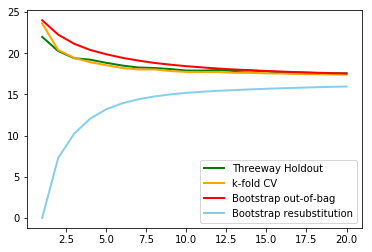

In [19]:
# multiple line plot
plt.plot( 'K', 'Threeway Holdout', data=df_rmse, marker='', color='green', linewidth=2)
plt.plot( 'K', 'k-fold CV', data=df_rmse, marker='', color='orange', linewidth=2)
plt.plot( 'K', 'Bootstrap out-of-bag', data=df_rmse, marker='', color='red', linewidth=2)
plt.plot( 'K', 'Bootstrap resubstitution', data=df_rmse, marker='', color='skyblue', linewidth=2)
plt.legend()

In [20]:
df_mae = pd.DataFrame({'K': KNN_para_K,
                       'Threeway Holdout': np.round(KNN_mae_3way,2), 
                       'k-fold CV': np.round(KNN_mae_cv,2), 
                       'Bootstrap out-of-bag': np.round(KNN_rmse_boot_ofb,2), 
                       'Bootstrap resubstitution': np.round(KNN_rmse_boot_re,2)})
df_mae

,K,Threeway Holdout,k-fold CV,Bootstrap out-of-bag,Bootstrap resubstitution
0,1,17.51,18.58,24.01,0.00
1,2,16.42,16.34,22.26,7.28
2,3,16.12,15.76,21.15,10.24
3,4,15.79,15.41,20.40,12.07
4,5,15.40,15.19,19.88,13.19
5,6,15.13,14.87,19.45,13.92
6,7,14.88,14.83,19.11,14.41
7,8,15.12,14.83,18.83,14.75
8,9,14.91,14.74,18.61,15.00
9,10,14.73,14.67,18.43,15.19


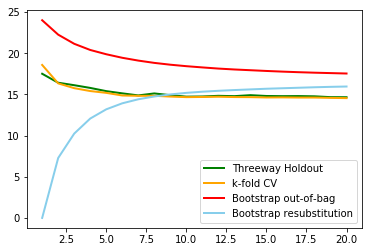

In [21]:
# multiple line plot
plt.plot( 'K', 'Threeway Holdout', data=df_mae, marker='', color='green', linewidth=2)
plt.plot( 'K', 'k-fold CV', data=df_mae, marker='', color='orange', linewidth=2)
plt.plot( 'K', 'Bootstrap out-of-bag', data=df_mae, marker='', color='red', linewidth=2)
plt.plot( 'K', 'Bootstrap resubstitution', data=df_mae, marker='', color='skyblue', linewidth=2)
plt.legend()